# Practica 3
## Gabriela Gutiérrez-Colomer: g.gutierrezcolomer@cunef.edu
Usando el dataset CIFAR 100:
- Implementar una red convolucional con las optimizaciones vistas para obtener el mejor score posible.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
import tensorflow as tf
#from functions import show_history, r2_keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from time import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import cifar100
import torchvision.transforms as tt
import sys
sys.path.insert(1, '/kaggle/input/functions')
import sys
sys.path.insert(1, '/kaggle/input/functions-images')

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train/255
x_test = x_test/255

169017344/169001437 [==============================] - 3s 0us/step


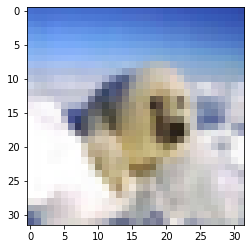

In [3]:
plt.imshow(x_train[62])

2022-12-08 17:56:16.056440: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 17:56:16.057477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 17:56:16.058144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 17:56:16.060561: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

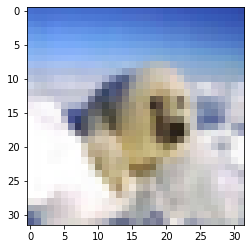

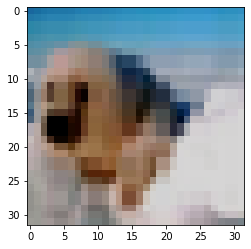

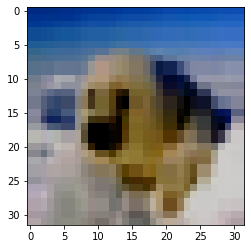

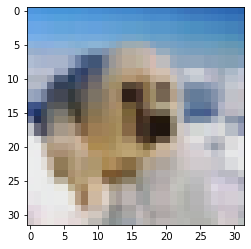

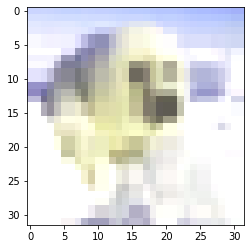

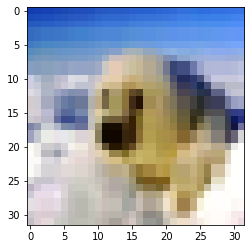

In [4]:
from tensorflow.data import Dataset
from functions_images import processing_data, data_aug

train_augmented = Dataset.from_tensor_slices((x_train, y_train))
val_augmented = Dataset.from_tensor_slices((x_test, y_test))


plt.imshow(x_train[62])
plt.show()
for _ in range(5):
    image_mod = np.array(processing_data(x_train[62], 0)[0])
    plt.imshow(image_mod)
    plt.show()
  

In [5]:
train_augmented = data_aug(train_augmented, shuffle=True, augment=True)

val_augmented = data_aug(val_augmented)

In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import RandomNormal, Constant


input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)

layer = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Dropout(0.2)(layer)


layer = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)

layer = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Dropout(0.2)(layer)


layer = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)

layer = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Dropout(0.2)(layer)

layer = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)

layer = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Dropout(0.2)(layer)


layer = Flatten()(layer)
layer = Dense(units=1024, activation='relu')(layer)
layer = Dropout(0.2)(layer)
layer = (BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 256)       0     

In [ ]:
history = model.fit(train_augmented, batch_size=64, epochs=90,steps_per_epoch=100,
                    validation_data=val_augmented, validation_steps=100, callbacks=[early_stopping])

2022-12-08 17:58:21.041558: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1228800000 exceeds 10% of free system memory.
2022-12-08 17:58:21.905348: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/90


2022-12-08 17:58:24.681827: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - ETA: 0s - loss: 4.0530 - accuracy: 0.0976

In [ ]:
show_history(history)